In [1]:
# importing make_moons dataset

from sklearn.datasets import make_moons

m =1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

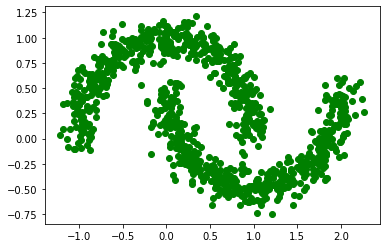

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_moons[:,0], X_moons[:,1 ], 'go')

In [6]:
X_moons[:5]

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       [ 0.288851  , -0.44866862],
       [-0.83343911,  0.53505665]])

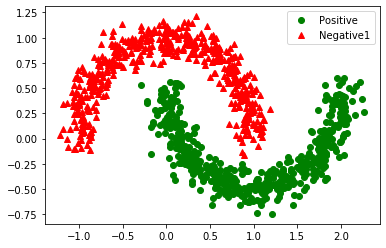

In [9]:
plt.plot(X_moons[y_moons==1,0], X_moons[y_moons==1,1], 'go', label="Positive")
plt.plot(X_moons[y_moons==0,0], X_moons[y_moons==0,1],'r^',label="Negative1")
plt.legend()
plt.show()

In [12]:
# adding extra feature x0 = 1 to every instatnce
# which is adding bias
import numpy as np

X_moons_with_bias = np.c_[np.ones((m,1)), X_moons]

In [13]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [14]:
# reshape y_moons to a 2D array with single column
# also known as column vector

y_moons_column_vector = y_moons.reshape(-1,1)

In [15]:
y_moons_column_vector[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [17]:
# splitting the data into training and testing set

test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]

# checking
a = [2,3,4,5,6,7,6]
print("a: ",a[-3:])
####

X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

a:  [6, 7, 6]


In [18]:
# samllfuncition to create batches

def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0,len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [19]:
# small batch

X_batch, y_batch= random_batch(X_train, y_train,5)
print(X_batch)

[[ 1.          2.00951042  0.25680049]
 [ 1.          0.76996505  0.30647189]
 [ 1.          0.90668472  0.59673506]
 [ 1.          1.25237519 -0.4517255 ]
 [ 1.          1.0638348   0.31609255]]


In [20]:
print(y_batch)

[[1]
 [0]
 [0]
 [1]
 [0]]


In [23]:
# creating a simple graph without the bells and whistles
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(42)
    np.random.seed(seed)

reset_graph()


In [24]:
# since moons dataset has two input features, 
# and each instance is a point on a plane

n_inputs = 2

In [25]:
# creating a logistic regression model
# it first creates a weighted sum of the inputs
# then it applies sigmoid function to the result
# which gives us the estimated porbability if positive class

X = tf.placeholder(tf.float32, shape=(None,n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1),name="y")
theta = tf.Variable(tf.random_uniform([n_inputs +1,1], -1.0,1.0,seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1/ (1 + tf.exp(-logits))

In [26]:
# we can also use sigmoid function
y_proba = tf.sigmoid(logits)

In [27]:
# log cost function

epsilon = 1e-7
loss = -tf.reduce_mean(y * tf.log(y_proba + epsilon) + (1-y) * tf.log(1 - y_proba + epsilon))

In [29]:
# tensorflow losses
loss = tf.losses.log_loss(y, y_proba)

W0521 06:55:39.860162 15204 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
# creating the optimizer

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [31]:
init = tf.global_variables_initializer()

In [34]:
# creating the model

n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m/ batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train,batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        loss_val = loss.eval({X:X_test, y:y_test})
        if epoch % 100 == 0:
            print("epoch: ", epoch, " loss: ",loss_val)
    y_proba_val = y_proba.eval(feed_dict={X:X_test, y:y_test})

epoch:  0  loss:  0.79451036
epoch:  100  loss:  0.34322548
epoch:  200  loss:  0.30738765
epoch:  300  loss:  0.2926358
epoch:  400  loss:  0.2848788
epoch:  500  loss:  0.28070775
epoch:  600  loss:  0.27844998
epoch:  700  loss:  0.27632472
epoch:  800  loss:  0.27562428
epoch:  900  loss:  0.27463737


In [35]:
# getiting truw and false values
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [37]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_test, y_pred)

0.8613861386138614

In [38]:
recall_score(y_test, y_pred)

0.8787878787878788

In [39]:
# strating over with bells and whistles
# defining th egraph with logistic_regression() function taht can be reused
# saving checkpoint using a saver at regular intervals druing trainig nad save the final model
# restore the last checkpoint at startup if training was interrupted
# Defining the graph using nice scopes so that graph looks good in tensorbiard
# add summaries to visualise the learning curves in TensorBoard
# tweaking the hyperarameters such as learning rate or mini batch size and look at the shape of learning curve

# before starting we will also add 4 more features x1^2, x2^2, x1^3, x2^3

X_train_enhanced = np.c_ [X_train, 
                          np.square(X_train[:,1]),
                          np.square(X_train[:,2]),
                          X_train[:,1] ** 3,
                          X_train[:,2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:,1]),
                        np.square(X_test[:,2]),
                        X_test[:,1] ** 3,
                        X_test[:,2] ** 3]

In [40]:
X_train_enhanced[:5]

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01,
         2.64912752e-03,  1.97312424e-01, -1.36349734e-04,
         8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01,
         1.06505890e+00,  1.76182639e-01,  1.09915879e+00,
        -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01,
         7.53236288e-01,  6.49368582e-02,  6.53727646e-01,
        -1.65476722e-02],
       [ 1.00000000e+00,  2.88850997e-01, -4.48668621e-01,
         8.34348982e-02,  2.01303531e-01,  2.41002535e-02,
        -9.03185778e-02],
       [ 1.00000000e+00, -8.33439108e-01,  5.35056649e-01,
         6.94620746e-01,  2.86285618e-01, -5.78924095e-01,
         1.53179024e-01]])

In [56]:
reset_graph()

# creating a logistic regression function to create a grph

def logistic_regression(X, y, initializer=None,seed=42, learning_rate=0.01 ):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0,1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba,scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [45]:
# getting logtime for tensorborad
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [58]:
# creating the graph and using filewriter
reset_graph()
n_inputs = 2+ 4
logdir =log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs+1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X,y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [61]:
# training step

import os 

n_epochs = 10001
batcj_size = 50
n_batches = int(np.ceil(m/batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        with open(checkpoint_epoch_path,"rb" )as f:
            start_epoch = int(f.read())
        print("Training was interrupetd.Continuing")
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
    
    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        loss_val, summary_str = sess.run([loss,loss_summary],feed_dict={X:X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch: ", epoch, " loss: ", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
    
    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

W0521 07:55:49.678794 15204 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Training was interrupetd.Continuing
Epoch:  10000  loss:  0.037131775


In [62]:
# getting the labels

y_pred = (y_proba_val >= 0.5)

In [63]:
precision_score(y_test,y_pred)

0.9797979797979798

In [64]:
recall_score(y_test, y_pred)

0.9797979797979798

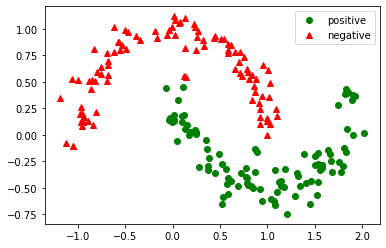

In [65]:
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], "go", label="positive")
plt.plot(X_test[~y_pred_idx,1], X_test[~y_pred_idx, 2],"r^", label="negative")
plt.legend()
plt.show()

In [66]:
# automating to find hyperparameter is left